In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker

In [3]:
paleomag=pd.read_excel("PINTv811.xlsx")
B_na_drop = paleomag.dropna(subset=["B"])
B_na_drop

,UID,OLD_DATA,REF,IDENT,SLAT,SLONG,AGE,DAGE,AGEMTD,CONTINENT,...,QSTAT,QTRM,QALT,QMD,QACN,QTECH,QLITH,QMAG,QDIR,QPI
0,2057,9420,177,Napier complex HM88021907A,-66.000,55.000,1400.000,50.000,K-Ar,Antarctica,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
1,2950,8163,613,QTW11-17,-36.000,289.000,0.801,0.012,Ar/Ar,South America,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,4271,NaN,738,NM31,31.357,130.211,6.660,0.450,K-Ar,Asia,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
3,4597,NaN,780,C8262-2,51.660,24.590,562.000,13.000,Stratigraphy,Europe,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,6.0
4,2358,3055,205,C-TP62,17.800,331.300,14.000,0.100,Estimated,Atlantic Ocean,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,555,746,62,R001A,65.000,345.000,4.500,1.000,Stratigraphy,Atlantic Ocean,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
4589,632,699,62,L033H,64.700,345.400,9.000,1.000,Stratigraphy,Atlantic Ocean,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
4590,553,761,62,S033,65.000,344.900,4.100,1.000,Stratigraphy,Atlantic Ocean,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
4591,537,774,62,V010,64.900,344.700,2.100,1.000,Stratigraphy,Atlantic Ocean,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0


In [4]:
ages=B_na_drop.iloc[:,6]
B=B_na_drop.iloc[:,19]
B

0         0.87
1         0.90
2         1.10
3         1.10
4         1.20
         ...  
4588    144.10
4589    149.10
4590    154.80
4591    198.70
4592    205.30
Name: B, Length: 4593, dtype: float64

In [5]:
B.isna().sum()

0

In [6]:
Small=B_na_drop.drop(['UID','OLD_DATA','REF','IDENT','SLAT','SLONG','DAGE','AGEMTD','CONTINENT','REPLOC','INTM','P','NDIR','INC','DEC','K', 'A95',
                     'NINT','DB','DB%','DBN(%)','VDM/VADM','VDM','VADM','GROUP','TYPE','ROCKMAG','COMMENTS','LOCATION NAME','QAGE',
                     'QSTAT','QTRM', 'QALT','QMD','QACN','QTECH','QLITH','QMAG','QDIR','QPI','FORM'],axis=1)
AGE=Small["AGE"]
B=Small["B"]
AGE

0       1400.000
1          0.801
2          6.660
3        562.000
4         14.000
          ...   
4588       4.500
4589       9.000
4590       4.100
4591       2.100
4592       9.000
Name: AGE, Length: 4593, dtype: float64

In [7]:
B

0         0.87
1         0.90
2         1.10
3         1.10
4         1.20
         ...  
4588    144.10
4589    149.10
4590    154.80
4591    198.70
4592    205.30
Name: B, Length: 4593, dtype: float64

In [8]:
Small
All_Values= Small.sort_values(by="AGE")
All = All_Values.rename(columns= { "AGE" : "Age All" , "B" : "B All" })
All=All.sort_values( by = "Age All")
All

,Age All,B All
4102,0.05,50.0
4011,0.05,48.0
4010,0.05,48.0
4009,0.05,48.0
1710,0.05,20.3
...,...,...
1589,4017.00,19.2
2863,4031.00,31.8
134,4114.00,4.2
1966,4128.00,22.6


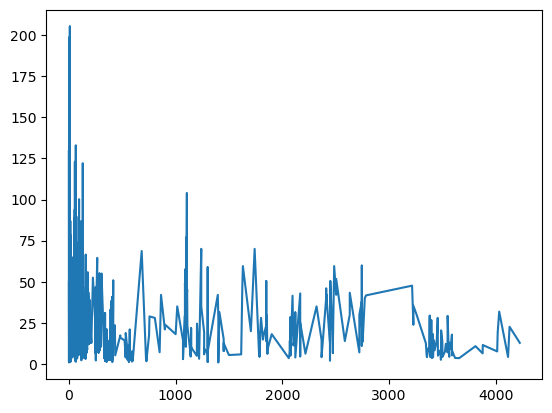

In [9]:
fig, ax=plt.subplots()
ax.plot(All["Age All"] , All["B All"])
plt.show()

In [10]:
count=Small.AGE.unique()
len(count)

1316

In [11]:
Small_sub = Small[(Small["AGE"]>=100) & (Small["AGE"]<=541)]
Small_sub

,AGE,B
7,407.250,1.3
8,352.800,1.3
19,338.900,1.9
21,338.900,2.0
24,252.314,2.1
...,...,...
4564,130.000,101.9
4576,130.000,116.4
4579,130.000,118.2
4580,130.000,122.0


In [12]:
SMALL=S

NameError: name 'S' is not defined

In [30]:
AGE.to_numpy()

array([1.40e+03, 8.01e-01, 6.66e+00, ..., 4.10e+00, 2.10e+00, 9.00e+00])

In [31]:
B.to_numpy()

array([  0.87,   0.9 ,   1.1 , ..., 154.8 , 198.7 , 205.3 ])

In [32]:
from statistics import mean

y_dict={}

for unique_x in AGE:
    indices= [i for i, x in enumerate(AGE) if x == unique_x]
    y_dict[unique_x] = mean(B[i] for i in indices)

for x in y_dict:
    print(f" average of y values for x = {x}: {y_dict[x]}")

 average of y values for x = 1400.0: 14.435
 average of y values for x = 0.801: 0.9
 average of y values for x = 6.66: 5.555555555555555
 average of y values for x = 562.0: 6.071428571428571
 average of y values for x = 14.0: 12.25
 average of y values for x = 1300.0: 11.470967741935484
 average of y values for x = 65.5: 5.916
 average of y values for x = 407.25: 12.29
 average of y values for x = 352.8: 9.085714285714285
 average of y values for x = 12.8: 5.886363636363637
 average of y values for x = 591.0: 4.1
 average of y values for x = 726.0: 1.6
 average of y values for x = 0.773: 5.542857142857143
 average of y values for x = 4.0: 21.8
 average of y values for x = 60.1: 26.691666666666666
 average of y values for x = 598.0: 1.8
 average of y values for x = 338.9: 10.084615384615384
 average of y values for x = 2446.0: 10.433333333333334
 average of y values for x = 252.314: 12.099926900584796
 average of y values for x = 117.0: 28.27558823529412
 average of y values for x = 723

In [33]:
Y_avg = y_dict.items()

In [34]:
Paleomag_avg=list(Y_avg)
Paleomag_avg

[(1400.0, 14.435),
 (0.801, 0.9),
 (6.66, 5.555555555555555),
 (562.0, 6.071428571428571),
 (14.0, 12.25),
 (1300.0, 11.470967741935484),
 (65.5, 5.916),
 (407.25, 12.29),
 (352.8, 9.085714285714285),
 (12.8, 5.886363636363637),
 (591.0, 4.1),
 (726.0, 1.6),
 (0.773, 5.542857142857143),
 (4.0, 21.8),
 (60.1, 26.691666666666666),
 (598.0, 1.8),
 (338.9, 10.084615384615384),
 (2446.0, 10.433333333333334),
 (252.314, 12.099926900584796),
 (117.0, 28.27558823529412),
 (723.0, 3.977777777777778),
 (579.0, 4.2375),
 (0.79, 12.65),
 (364.4, 6.866666666666667),
 (584.0, 2.4),
 (2.77, 3.4139999999999997),
 (387.8, 8.899736842105263),
 (3485.0, 2.5),
 (1.0, 34.05416666666667),
 (0.8, 23.757894736842104),
 (550.0, 6.3875),
 (57.1, 2.7),
 (381.0, 2.7),
 (3.2, 3.45),
 (1069.0, 6.733333333333333),
 (155.7, 14.8375),
 (2.97, 3.0),
 (0.783, 15.625),
 (380.4, 3.8),
 (410.8, 11.475),
 (1220.0, 3.11),
 (77.6, 30.2),
 (7.0, 25.6),
 (0.771, 20.755555555555556),
 (565.0, 3.4),
 (2060.0, 3.5),
 (3656.0, 3.5)

In [35]:
columns_name=['Age', 'Average PI']

In [36]:
PI=pd.DataFrame(Paleomag_avg, columns=columns_name)

In [37]:
PI

,Age,Average PI
0,1400.000,14.435000
1,0.801,0.900000
2,6.660,5.555556
3,562.000,6.071429
4,14.000,12.250000
...,...,...
1311,1.360,81.550000
1312,95.300,93.825000
1313,1.740,99.170000
1314,7.540,101.400000


In [38]:
Age=PI["Age"]
Average_PI=PI["Average PI"]

In [39]:
Age_2= PI.sort_values(by='Age')
Age_2

,Age,Average PI
532,0.0500,41.977778
393,0.0506,15.600000
342,0.0513,13.900000
1022,0.0514,38.300000
463,0.0519,18.200000
...,...,...
495,4017.0000,19.200000
864,4031.0000,31.800000
76,4114.0000,4.200000
594,4128.0000,22.600000


<Figure size 640x480 with 0 Axes>

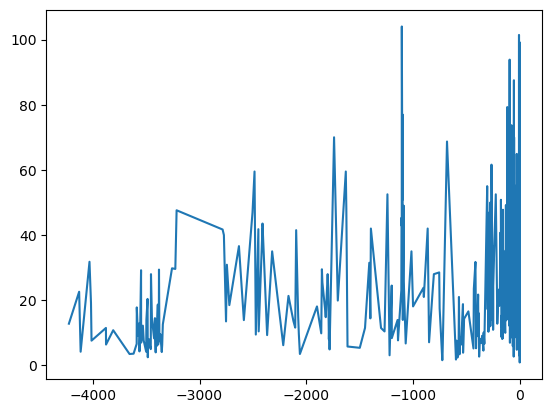

In [40]:
plt.clf()
fig, ax=plt.subplots()
ax.plot(-Age_2["Age"],Age_2["Average PI"])
matplotlib.ticker.LinearLocator(numticks=1000)
plt.show()

In [41]:
columns_name_new=['Age Cryo-Cam','PI Avg Cryo-Cam']

In [42]:
PI_edi = PI[(PI["Age"]>=485.4) & (PI["Age"]<=720)]
PI_edi = PI_edi.rename(columns= { "Age" : "Age Cryo Cam" , "Average PI" : "PI Avg Cryo Cam" })
PI_edi=PI_edi.sort_values( by = "Age Cryo Cam")
PI_edi=PI_edi.iloc[::-1]
PI_edi

,Age Cryo Cam,PI Avg Cryo Cam
214,720.00,8.100000
1301,682.00,68.700000
15,598.00,1.800000
191,592.50,7.600000
10,591.00,4.100000
104,587.00,5.100000
53,585.00,3.700000
24,584.00,2.400000
61,580.00,4.145000
21,579.00,4.237500


C:\Users\esc\AppData\Local\Temp\ipykernel_24248\213355007.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ticks_labels)


<Figure size 640x480 with 0 Axes>

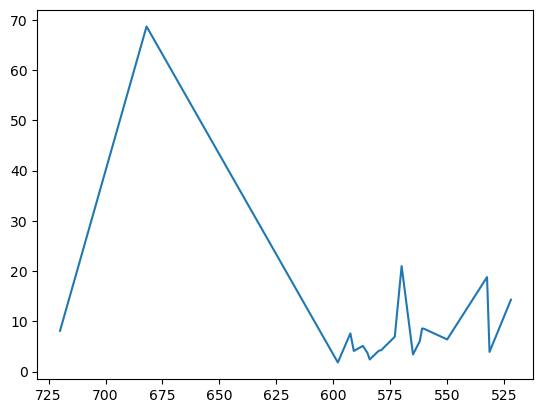

In [43]:
plt.clf()
fig, ax=plt.subplots()
ax.plot(-PI_edi["Age Cryo Cam"],PI_edi["PI Avg Cryo Cam"])
ticks_labels=[0,725,700,675,650,625,600,575,550,525]
ax.set_xticklabels(ticks_labels)
plt.show()

In [79]:
Target = PI[(PI["Age"]>=0) & (PI["Age"]<=541)]
Target = Target.rename(columns= { "Age" : "Age Edi Hol" , "Average PI" : "PI Avg Edi Hol" })
Target=Target.sort_values( by = "Age Edi Hol")
Target=Target.iloc[::-1]
Target

,Age Edi Hol,PI Avg Edi Hol
482,532.4900,18.800000
60,531.4000,3.900000
359,522.0000,14.300000
402,481.8000,16.577778
105,434.0000,5.200000
...,...,...
463,0.0519,18.200000
1022,0.0514,38.300000
342,0.0513,13.900000
393,0.0506,15.600000


<Figure size 640x480 with 0 Axes>

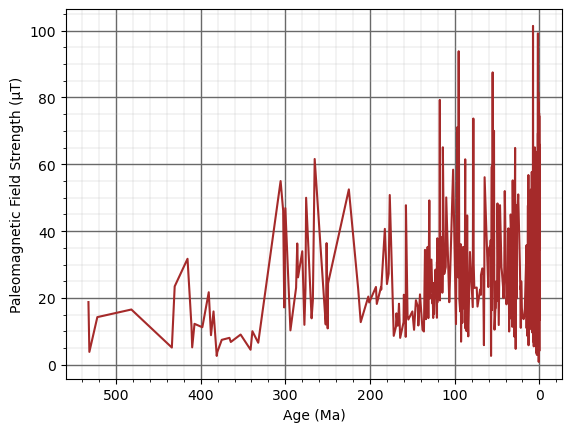

In [83]:
plt.clf()
fig, ax=plt.subplots()
ax.plot(-Target["Age Edi Hol"],Target["PI Avg Edi Hol"],color="brown")
ax.grid(which = "major", linewidth = 1, color="dimgray")
ax.grid(which = "minor", linewidth = 0.2)
ax.minorticks_on()
ax.set_title=("Paleomagnetic Field Strength Through the Phanerozoic")
ax.set_xlabel("Age (Ma)")
ax.set_ylabel("Paleomagnetic Field Strength (μT)") 
ticks=[0,-500,-400,-300,-200,-100]
ax.set_xticks(ticks)
ticks_labels=[0,500,400,300,200,100]
ax.set_xticklabels(ticks_labels)
ax.figure.savefig("Paleomagnetic_graph.png")

In [46]:
EdiDev = PI[(PI["Age"]>=400) & (PI["Age"]<=720)]
EdiDev = EdiDev.rename(columns= { "Age" : "Age Edi Dev" , "Average PI" : "PI Avg Edi Dev" })
EdiDev=EdiDev.sort_values( by = "Age Edi Dev")
EdiDev=EdiDev.iloc[::-1]
EdiDev

,Age Edi Dev,PI Avg Edi Dev
214,720.00,8.100000
1301,682.00,68.700000
15,598.00,1.800000
191,592.50,7.600000
10,591.00,4.100000
104,587.00,5.100000
53,585.00,3.700000
24,584.00,2.400000
61,580.00,4.145000
21,579.00,4.237500


<Figure size 640x480 with 0 Axes>

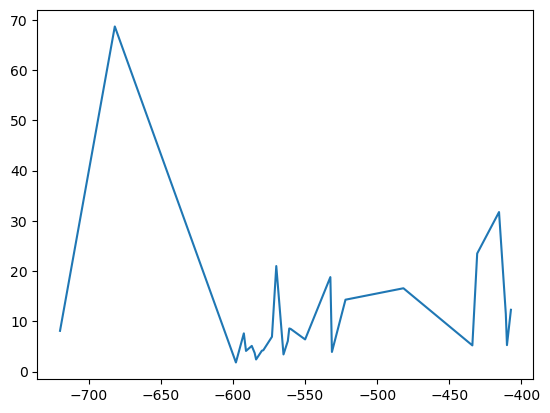

In [47]:
plt.clf()
fig, ax=plt.subplots()
ax.plot(-EdiDev["Age Edi Dev"],EdiDev["PI Avg Edi Dev"])
#ticks_labels=[0,725,700,675,650,625,600,575,550,525]
#ax.set_xticklabels(ticks_labels)
plt.show()

In [48]:
edi_only = PI[(PI["Age"]>530) & (PI["Age"]<=720)]
edi_only = edi_only.rename(columns= { "Age" : "Age Ediacaran Only" , "Average PI" : "PI Avg Ediacaran Only" })
edi_only=edi_only.sort_values( by = "Age Ediacaran Only")
edi_only=edi_only.iloc[::-1]
edi_only

,Age Ediacaran Only,PI Avg Ediacaran Only
214,720.00,8.100000
1301,682.00,68.700000
15,598.00,1.800000
191,592.50,7.600000
10,591.00,4.100000
104,587.00,5.100000
53,585.00,3.700000
24,584.00,2.400000
61,580.00,4.145000
21,579.00,4.237500


<Figure size 640x480 with 0 Axes>

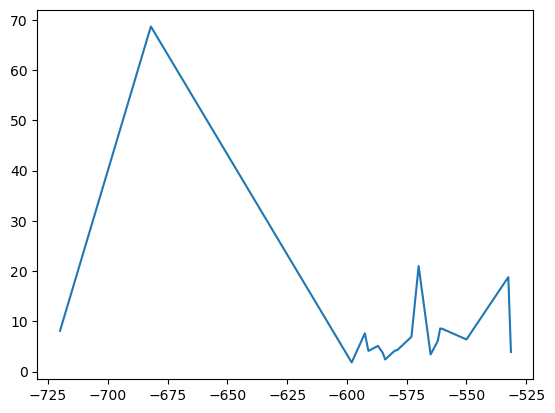

In [49]:
plt.clf()
fig, ax=plt.subplots()
ax.plot(-edi_only["Age Ediacaran Only"],edi_only["PI Avg Ediacaran Only"])
#ticks_labels=[0,725,700,675,650,625,600,575,550,525]
#ax.set_xticklabels(ticks_labels)
plt.show()

In [50]:
Ediacaran_Genera_Ages=[541,542,543,544,545,547,548,550,552,555,557,558,562,566,567,576]
Ediacaran_Genera_Unique=[8,5,3,1,3,4,20,34,21,19,19,43,13,20,10,8]
print(Ediacaran_Genera_Ages)
print(Ediacaran_Genera_Unique)
Edi_Gen=pd.DataFrame({"Column 1":Ediacaran_Genera_Unique,"Column 2":Ediacaran_Genera_Ages})
Edi_Gen

[541, 542, 543, 544, 545, 547, 548, 550, 552, 555, 557, 558, 562, 566, 567, 576]
[8, 5, 3, 1, 3, 4, 20, 34, 21, 19, 19, 43, 13, 20, 10, 8]


,Column 1,Column 2
0,8,541
1,5,542
2,3,543
3,1,544
4,3,545
5,4,547
6,20,548
7,34,550
8,21,552
9,19,555


<Figure size 640x480 with 0 Axes>

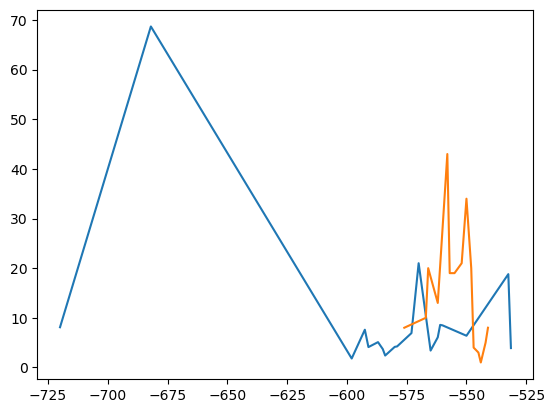

In [51]:
plt.clf()
fig, ax=plt.subplots()
ax.plot(-edi_only["Age Ediacaran Only"],edi_only["PI Avg Ediacaran Only"])
ax.plot(-Edi_Gen['Column 2'],Edi_Gen['Column 1'])
#ticks_labels=[0,725,700,675,650,625,600,575,550,525]
#ax.set_xticklabels(ticks_labels)
plt.show()

In [52]:
edi_only_small = PI[(PI["Age"]>530) & (PI["Age"]<=580)]
edi_only_small = edi_only_small.rename(columns= { "Age" : "Age Ediacaran Only Small" , "Average PI" : "PI Avg Ediacaran Only Small" })
edi_only_small=edi_only_small.sort_values( by = "Age Ediacaran Only Small")
edi_only_small=edi_only_small.iloc[::-1]
edi_only_small

,Age Ediacaran Only Small,PI Avg Ediacaran Only Small
61,580.00,4.145000
21,579.00,4.237500
162,573.00,6.920000
546,570.00,21.000000
44,565.00,3.400000
3,562.00,6.071429
134,561.00,8.575000
221,560.00,8.480000
30,550.00,6.387500
482,532.49,18.800000


<Figure size 640x480 with 0 Axes>

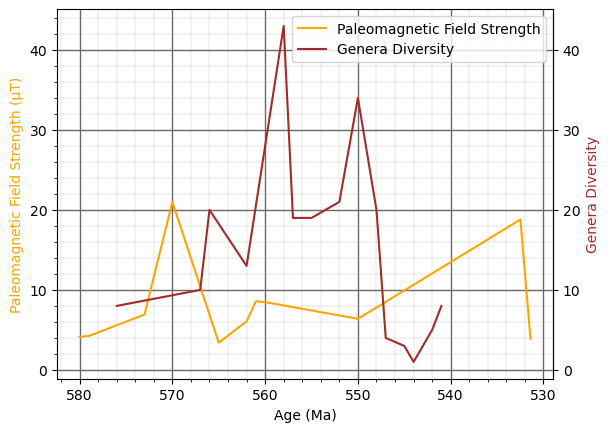

In [53]:
plt.clf()
fig, ax=plt.subplots()
ax.plot(-edi_only_small["Age Ediacaran Only Small"],edi_only_small["PI Avg Ediacaran Only Small"],color="orange",label="Paleomagnetic Field Strength")
ax.plot(-Edi_Gen['Column 2'],Edi_Gen['Column 1'],color="brown",label="Genera Diversity")
ax.legend()
ax.set_title=("Paleomagnetic Field Strength Through the Phanerozoic")
ax.set_xlabel("Age (Ma)")
ax.yaxis.label.set_color('orange')
ax.set_ylabel("Paleomagnetic Field Strength (μT)")
ax.grid(which = "major", linewidth = 1, color="dimgray")
ax.grid(which = "minor", linewidth = 0.2)
ticks=[-580,-570,-560,-550,-540,-530]
ax.set_xticks(ticks)
ticks_labels=[580,570,560,550,540,530]
ax.set_xticklabels(ticks_labels)
ax.minorticks_on()
secax=ax.secondary_yaxis("right")
secax.set_ylabel("Genera Diversity")
secax.yaxis.label.set_color("brown")
#ticks_labels=[0,725,700,675,650,625,600,575,550,525]
#ax.set_xticklabels(ticks_labels)
plt.show()
ax.legend
ax.figure.savefig("Ediacaran_Paleomag.png")